In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_iris, load_wine, load_diabetes, fetch_california_housing, make_blobs

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, classification_report, confusion_matrix

In [5]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier

In [7]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder

In [8]:
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2, f_regression

In [9]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [10]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

<h2>Comparison of Regression Methods </h2>

In [11]:
cal_house = fetch_california_housing()

In [12]:
X = cal_house.data
y = cal_house.target

In [13]:
#std_scale = StandardScaler()
#scaled_X = std_scale.fit_transform(X)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2004)

<h3>Linear Regression</h3>

In [15]:
line_reg = LinearRegression()

In [16]:
line_reg.fit(X_train, y_train)

LinearRegression()

In [17]:
line_reg_pred = line_reg.predict(X_test)

In [18]:
print("Mean Squared Error :", mean_squared_error(y_test, line_reg_pred))
print("Mean Absolute Error :", mean_absolute_error(y_test, line_reg_pred))
print("R2 score :", r2_score(y_test, line_reg_pred))

Mean Squared Error : 0.5335706971994392
Mean Absolute Error : 0.5288875541315309
R2 score : 0.5981167123338135


<h3>Ridge Regression</h3>

In [19]:
ridge_reg = Ridge(alpha = 0.2)

In [20]:
ridge_reg.fit(X_train, y_train)

Ridge(alpha=0.2)

In [21]:
ridge_reg_pred = ridge_reg.predict(X_test)

In [22]:
print("Mean Squared Error :", mean_squared_error(y_test, ridge_reg_pred))
print("Mean Absolute Error :", mean_absolute_error(y_test, ridge_reg_pred))
print("R2 score :", r2_score(y_test, ridge_reg_pred))

Mean Squared Error : 0.5335556556934811
Mean Absolute Error : 0.528889949745202
R2 score : 0.5981280415351689


<h3>Lasso Regression</h3>

In [23]:
lasso_reg = Lasso(alpha = 0.2)

In [24]:
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.2)

In [25]:
lasso_reg_pred = lasso_reg.predict(X_test)

In [26]:
print("Mean Squared Error :", mean_squared_error(y_test, lasso_reg_pred))
print("Mean Absolute Error :", mean_absolute_error(y_test, lasso_reg_pred))
print("R2 score :", r2_score(y_test, lasso_reg_pred))

Mean Squared Error : 0.6566056964194807
Mean Absolute Error : 0.6141228923416346
R2 score : 0.5054472493290356


<h3>ElasticNet</h3>

In [27]:
elasticnet_reg = ElasticNet(alpha = 0.1, l1_ratio = 0.5)

In [28]:
elasticnet_reg.fit(X_test, y_test)

ElasticNet(alpha=0.1)

In [29]:
elasticnet_reg_pred = elasticnet_reg.predict(X_test)

In [30]:
print("Mean Squared Error :", mean_squared_error(y_test, elasticnet_reg_pred))
print("Mean Absolute Error :", mean_absolute_error(y_test, elasticnet_reg_pred))
print("R2 score :", r2_score(y_test, elasticnet_reg_pred))

Mean Squared Error : 0.5564474403111184
Mean Absolute Error : 0.5555067320305473
R2 score : 0.5808860420944769


In [31]:
print('Result of Different Regression Methods')
print('Linear Regression R2 Score :', r2_score(y_test, line_reg_pred))
print('Ridge Regression R2 Score  :', r2_score(y_test, ridge_reg_pred))
print('Lasso Regression R2 Score  :', r2_score(y_test, lasso_reg_pred))
print('ElasticNet R2 Score        :', r2_score(y_test, elasticnet_reg_pred))

Result of Different Regression Methods
Linear Regression R2 Score : 0.5981167123338135
Ridge Regression R2 Score  : 0.5981280415351689
Lasso Regression R2 Score  : 0.5054472493290356
ElasticNet R2 Score        : 0.5808860420944769


<h2>Comparison of Classification Methods</h2>

In [32]:
#wine = load_wine()

In [33]:
#X = wine.data
#y = wine.target

In [34]:
#std_scale = StandardScaler()
#scaled_X = std_scale.fit_transform(X)

In [35]:
#data = pd.read_csv('gender_classification_v7.csv')

In [36]:
data = pd.read_csv('weather_classification_data.csv')

In [37]:
data.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [38]:
X = data.drop(['Cloud Cover', 'Season', 'Location', 'Weather Type'], axis = 1)
y = data['Weather Type']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2004)

<h3>Logistic Regression</h3>

In [40]:
log_reg = LogisticRegression(max_iter = 100000)

In [41]:
log_reg.fit(X_train, y_train)

C:\Users\kalat\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=100000)

In [42]:
log_reg_pred = log_reg.predict(X_test)

In [43]:
print("Accuracy :", accuracy_score(y_test, log_reg_pred))
print("Confusion Matrix :\n", confusion_matrix(y_test, log_reg_pred))
print("Classification Report :\n", classification_report(y_test, log_reg_pred))

Accuracy : 0.8628787878787879
Confusion Matrix :
 [[817  88  19  83]
 [ 46 907  45  35]
 [ 24  14 905  31]
 [ 61  66  31 788]]
Classification Report :
               precision    recall  f1-score   support

      Cloudy       0.86      0.81      0.84      1007
       Rainy       0.84      0.88      0.86      1033
       Snowy       0.91      0.93      0.92       974
       Sunny       0.84      0.83      0.84       946

    accuracy                           0.86      3960
   macro avg       0.86      0.86      0.86      3960
weighted avg       0.86      0.86      0.86      3960



<h3>K Nearest Neighbor</h3>

In [44]:
knn_class = KNeighborsClassifier(n_neighbors = 4)

In [45]:
knn_class.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [46]:
knn_class_pred = knn_class.predict(X_test)

In [47]:
print("Accuracy :", accuracy_score(y_test, knn_class_pred))
print("\nConfusion Matrix :\n", confusion_matrix(y_test, knn_class_pred))
print("\nClassification Report :\n", classification_report(y_test, knn_class_pred))

Accuracy : 0.8800505050505051

Confusion Matrix :
 [[871  70  22  44]
 [ 78 900  26  29]
 [ 32  21 902  19]
 [ 71  40  23 812]]

Classification Report :
               precision    recall  f1-score   support

      Cloudy       0.83      0.86      0.85      1007
       Rainy       0.87      0.87      0.87      1033
       Snowy       0.93      0.93      0.93       974
       Sunny       0.90      0.86      0.88       946

    accuracy                           0.88      3960
   macro avg       0.88      0.88      0.88      3960
weighted avg       0.88      0.88      0.88      3960



<h3>Support Vector Machine</h3>

In [48]:
svm_class = SVC()

In [49]:
svm_class.fit(X_train, y_train)

SVC()

In [50]:
svm_class_pred = svm_class.predict(X_test)

In [51]:
print("Accuracy :", accuracy_score(y_test, svm_class_pred))
print("\nConfusion Matrix :\n", confusion_matrix(y_test, svm_class_pred))
print("\nClassification Report :\n", classification_report(y_test, svm_class_pred))

Accuracy : 0.8247474747474748

Confusion Matrix :
 [[744 151  26  86]
 [ 55 889  64  25]
 [ 22  11 920  21]
 [ 46 150  37 713]]

Classification Report :
               precision    recall  f1-score   support

      Cloudy       0.86      0.74      0.79      1007
       Rainy       0.74      0.86      0.80      1033
       Snowy       0.88      0.94      0.91       974
       Sunny       0.84      0.75      0.80       946

    accuracy                           0.82      3960
   macro avg       0.83      0.82      0.82      3960
weighted avg       0.83      0.82      0.82      3960



<h3>Decision Tree</h3>

In [52]:
dec_tree = DecisionTreeClassifier()

In [53]:
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [54]:
dec_tree_pred = dec_tree.predict(X_test)

In [55]:
print("Accuracy :", accuracy_score(y_test, dec_tree_pred))
print("\nConfusion Matrix :\n", confusion_matrix(y_test, dec_tree_pred))
print("\nClassification Report :\n", classification_report(y_test, dec_tree_pred))

Accuracy : 0.8967171717171717

Confusion Matrix :
 [[888  47  31  41]
 [ 66 908  21  38]
 [ 19  18 912  25]
 [ 49  23  31 843]]

Classification Report :
               precision    recall  f1-score   support

      Cloudy       0.87      0.88      0.88      1007
       Rainy       0.91      0.88      0.90      1033
       Snowy       0.92      0.94      0.93       974
       Sunny       0.89      0.89      0.89       946

    accuracy                           0.90      3960
   macro avg       0.90      0.90      0.90      3960
weighted avg       0.90      0.90      0.90      3960



<h3>Random Forest</h3>

In [56]:
rand_for = RandomForestClassifier()

In [57]:
rand_for.fit(X_train, y_train)

RandomForestClassifier()

In [58]:
rand_for_pred = rand_for.predict(X_test)

In [59]:
print("Accuracy :", accuracy_score(y_test, rand_for_pred))
print("\nConfusion Matrix :\n", confusion_matrix(y_test, rand_for_pred))
print("\nClassification Report :\n", classification_report(y_test, rand_for_pred))

Accuracy : 0.9037878787878788

Confusion Matrix :
 [[890  42  32  43]
 [ 49 923  21  40]
 [ 20  12 917  25]
 [ 44  29  24 849]]

Classification Report :
               precision    recall  f1-score   support

      Cloudy       0.89      0.88      0.89      1007
       Rainy       0.92      0.89      0.91      1033
       Snowy       0.92      0.94      0.93       974
       Sunny       0.89      0.90      0.89       946

    accuracy                           0.90      3960
   macro avg       0.90      0.90      0.90      3960
weighted avg       0.90      0.90      0.90      3960



<h3>Naive Bayes</h3>

In [60]:
naive_bayes_class = GaussianNB()

In [61]:
naive_bayes_class.fit(X_train, y_train)

GaussianNB()

In [62]:
naive_bayes_class_pred = naive_bayes_class.predict(X_test)

In [63]:
print("Accuracy :", accuracy_score(y_test, naive_bayes_class_pred))
print("\nConfusion Matrix :\n", confusion_matrix(y_test, naive_bayes_class_pred))
print("\nClassification Report :\n", classification_report(y_test, naive_bayes_class_pred))

Accuracy : 0.8593434343434343

Confusion Matrix :
 [[791 122  17  77]
 [ 29 914  35  55]
 [ 21   5 902  46]
 [ 41  88  21 796]]

Classification Report :
               precision    recall  f1-score   support

      Cloudy       0.90      0.79      0.84      1007
       Rainy       0.81      0.88      0.85      1033
       Snowy       0.93      0.93      0.93       974
       Sunny       0.82      0.84      0.83       946

    accuracy                           0.86      3960
   macro avg       0.86      0.86      0.86      3960
weighted avg       0.86      0.86      0.86      3960



<h3>Gradient Boosting</h3>

In [64]:
grad_boost_class = GradientBoostingClassifier()

In [65]:
grad_boost_class.fit(X_train, y_train)

GradientBoostingClassifier()

In [66]:
grad_boost_class_pred = grad_boost_class.predict(X_test) 

In [67]:
print("Accuracy :", accuracy_score(y_test, grad_boost_class_pred))
print("\nConfusion Matrix :\n", confusion_matrix(y_test, grad_boost_class_pred))
print("\nClassification Report :\n", classification_report(y_test, grad_boost_class_pred))

Accuracy : 0.9032828282828282

Confusion Matrix :
 [[877  51  28  51]
 [ 44 930  28  31]
 [ 15  21 912  26]
 [ 41  29  18 858]]

Classification Report :
               precision    recall  f1-score   support

      Cloudy       0.90      0.87      0.88      1007
       Rainy       0.90      0.90      0.90      1033
       Snowy       0.92      0.94      0.93       974
       Sunny       0.89      0.91      0.90       946

    accuracy                           0.90      3960
   macro avg       0.90      0.90      0.90      3960
weighted avg       0.90      0.90      0.90      3960



In [68]:
print('Result of Different Classification Methods')
print('Logistic Regression Accuracy    :', accuracy_score(y_test, log_reg_pred))
print('K Nearest Neighbor Accuracy     :', accuracy_score(y_test, knn_class_pred))
print('Support Vector Machine Accuracy :', accuracy_score(y_test, svm_class_pred))
print('Decision Tree Accuracy          :', accuracy_score(y_test, dec_tree_pred))
print('Random Forest Accuracy          :', accuracy_score(y_test, rand_for_pred))
print('Naive Bayes Accuracy            :', accuracy_score(y_test, naive_bayes_class_pred))
print('Gradient Boosting Accuracy      :', accuracy_score(y_test, grad_boost_class_pred))

Result of Different Classification Methods
Logistic Regression Accuracy    : 0.8628787878787879
K Nearest Neighbor Accuracy     : 0.8800505050505051
Support Vector Machine Accuracy : 0.8247474747474748
Decision Tree Accuracy          : 0.8967171717171717
Random Forest Accuracy          : 0.9037878787878788
Naive Bayes Accuracy            : 0.8593434343434343
Gradient Boosting Accuracy      : 0.9032828282828282


<h2>Comparison of Scalers</h2>

<h3>Without Scalling</h3>

In [69]:
data_scale = pd.read_csv('weather_classification_data.csv')

In [70]:
X_scale = data.drop(['Cloud Cover', 'Season', 'Location', 'Weather Type'], axis = 1)
y_scale = data['Weather Type']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y_scale, test_size = 0.3, random_state = 2744)

In [72]:
log_reg_without_std = LogisticRegression()

In [73]:
log_reg_without_std.fit(X_train, y_train)

C:\Users\kalat\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [74]:
log_reg_without_scale_pred = log_reg_without_std.predict(X_test)

In [75]:
print("Accuracy :", accuracy_score(y_test, log_reg_without_scale_pred))
print("Confusion Matrix :\n", confusion_matrix(y_test, log_reg_without_scale_pred))
print("Classification Report :\n", classification_report(y_test, log_reg_without_scale_pred))

Accuracy : 0.828030303030303
Confusion Matrix :
 [[793  92  44  82]
 [ 87 810  85  41]
 [ 44  22 889  32]
 [ 73  49  30 787]]
Classification Report :
               precision    recall  f1-score   support

      Cloudy       0.80      0.78      0.79      1011
       Rainy       0.83      0.79      0.81      1023
       Snowy       0.85      0.90      0.87       987
       Sunny       0.84      0.84      0.84       939

    accuracy                           0.83      3960
   macro avg       0.83      0.83      0.83      3960
weighted avg       0.83      0.83      0.83      3960



<h3>Standard Scalling</h3>

In [76]:
std_scaler = StandardScaler()

In [77]:
scaled_X = std_scaler.fit_transform(X_scale)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y_scale, test_size = 0.3, random_state = 2744)

In [79]:
log_reg_with_std = LogisticRegression()
log_reg_with_std.fit(X_train, y_train)

LogisticRegression()

In [80]:
log_reg_with_scale_pred = log_reg_with_std.predict(X_test)

In [81]:
print("Accuracy :", accuracy_score(y_test, log_reg_with_scale_pred))
print("Confusion Matrix :\n", confusion_matrix(y_test, log_reg_with_scale_pred))
print("Classification Report :\n", classification_report(y_test, log_reg_with_scale_pred))

Accuracy : 0.8583333333333333
Confusion Matrix :
 [[804  95  29  83]
 [ 47 898  33  45]
 [ 28  18 899  42]
 [ 60  58  23 798]]
Classification Report :
               precision    recall  f1-score   support

      Cloudy       0.86      0.80      0.82      1011
       Rainy       0.84      0.88      0.86      1023
       Snowy       0.91      0.91      0.91       987
       Sunny       0.82      0.85      0.84       939

    accuracy                           0.86      3960
   macro avg       0.86      0.86      0.86      3960
weighted avg       0.86      0.86      0.86      3960



<h3>MinMax Scalling</h3>

In [82]:
min_max_scale = MinMaxScaler()

In [83]:
scaled_X = min_max_scale.fit_transform(X_scale)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y_scale, test_size = 0.3, random_state = 2744)

In [85]:
log_reg_with_minmax = LogisticRegression()
log_reg_with_minmax.fit(X_train, y_train)

LogisticRegression()

In [86]:
log_reg_with_minmax_pred = log_reg_with_minmax.predict(X_test)

In [87]:
print("Accuracy :", accuracy_score(y_test, log_reg_with_minmax_pred))
print("Confusion Matrix :\n", confusion_matrix(y_test, log_reg_with_minmax_pred))
print("Classification Report :\n", classification_report(y_test, log_reg_with_minmax_pred))

Accuracy : 0.8537878787878788
Confusion Matrix :
 [[803  98  28  82]
 [ 51 883  46  43]
 [ 30  15 898  44]
 [ 54  66  22 797]]
Classification Report :
               precision    recall  f1-score   support

      Cloudy       0.86      0.79      0.82      1011
       Rainy       0.83      0.86      0.85      1023
       Snowy       0.90      0.91      0.91       987
       Sunny       0.83      0.85      0.84       939

    accuracy                           0.85      3960
   macro avg       0.85      0.85      0.85      3960
weighted avg       0.85      0.85      0.85      3960



In [88]:
print('Result of Different Scalling Methods')
print('Without Scalling Accuracy    :', accuracy_score(y_test, log_reg_without_scale_pred))
print('Standard Scaler Accuracy     :', accuracy_score(y_test, log_reg_with_scale_pred))
print('MinMax Scaler Accuracy       :', accuracy_score(y_test, log_reg_with_minmax_pred))

Result of Different Scalling Methods
Without Scalling Accuracy    : 0.828030303030303
Standard Scaler Accuracy     : 0.8583333333333333
MinMax Scaler Accuracy       : 0.8537878787878788


<h2>Comparison of Different Clustering Methods</h2>

In [89]:
X, y = make_blobs(n_samples = 215, n_features = 4, centers = 5, random_state = 44)
X_cluster = std_scaler.fit_transform(X)

<h3>K-Means</h3>

In [90]:
k_means = KMeans(5)

In [91]:
k_means.fit(X_cluster)
k_means_labels = k_means.predict(X_cluster)

C:\Users\kalat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


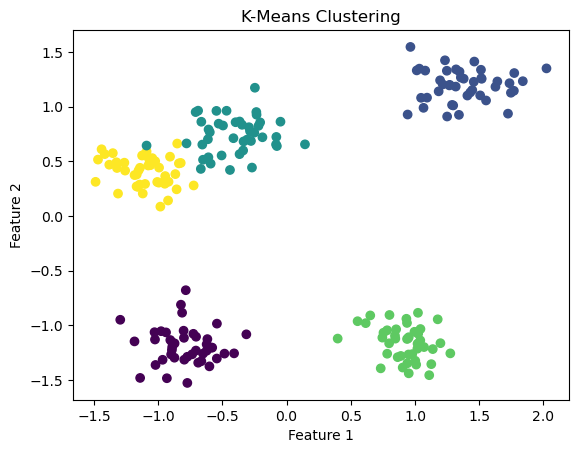

In [92]:
plt.scatter(X_cluster[:, 0], X_cluster[:, 1], c = k_means_labels, cmap = 'viridis', marker='o')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

<h3>DBSCAN</h3>

In [93]:
db_scan = DBSCAN()
db_scan_label = db_scan.fit_predict(X_cluster)

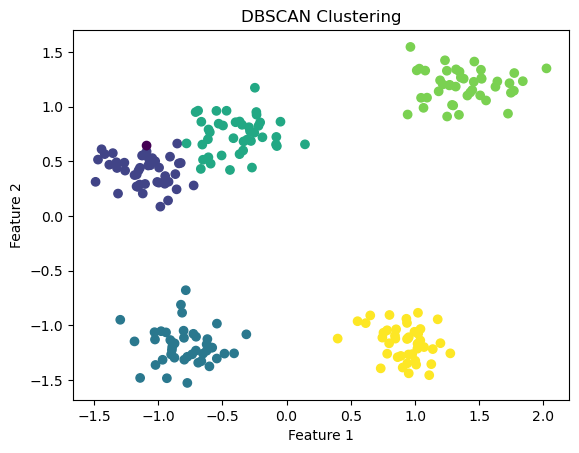

In [94]:
plt.scatter(X_cluster[:, 0], X_cluster[:, 1], c = db_scan_label, cmap = 'viridis', marker='o')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

<h3>Agglomerative</h3>

In [95]:
agglo = AgglomerativeClustering(n_clusters=5)
agglo_labels = agglo.fit_predict(X_cluster)

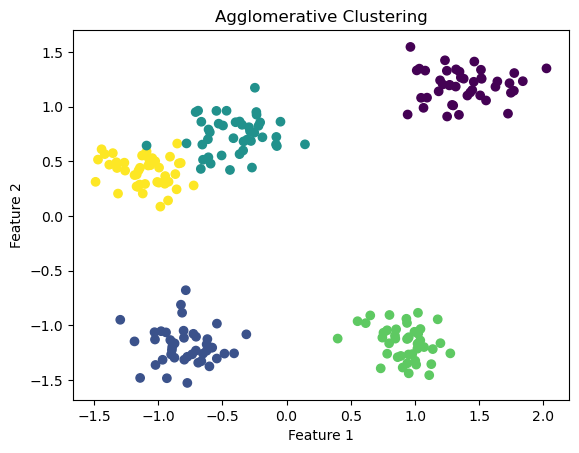

In [96]:
plt.scatter(X_cluster[:, 0], X_cluster[:, 1], c = agglo_labels, cmap = 'viridis', marker = 'o')
plt.title('Agglomerative Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

<h2>Feature Engineering Comparison</h2>

<h3>Feature Selection</h3>

In [97]:
data.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [98]:
df = data.drop(['Cloud Cover', 'Season', 'Location', 'Weather Type'], axis = 1)
X = df
y = data['Weather Type']

In [99]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
0,14.0,73,9.5,82.0,1010.82,2,3.5
1,39.0,96,8.5,71.0,1011.43,7,10.0
2,30.0,64,7.0,16.0,1018.72,5,5.5
3,38.0,83,1.5,82.0,1026.25,7,1.0
4,27.0,74,17.0,66.0,990.67,1,2.5


<h4>Variance Threshold</h4>

In [100]:
var_threshold = VarianceThreshold(threshold = 100)

In [101]:
X_hig_var = var_threshold.fit_transform(df)

In [102]:
high_variance = pd.DataFrame(X_hig_var, columns=[df.columns[i] for i in var_threshold.get_support(indices=True)])
print("\nData after Variance Thresholding:")
print(high_variance.head())


Data after Variance Thresholding:
   Temperature  Humidity  Precipitation (%)  Atmospheric Pressure
0         14.0      73.0               82.0               1010.82
1         39.0      96.0               71.0               1011.43
2         30.0      64.0               16.0               1018.72
3         38.0      83.0               82.0               1026.25
4         27.0      74.0               66.0                990.67


<h4>SelectKBest</h4>

In [103]:
select_k_best = SelectKBest(score_func = chi2, k = 4)

In [104]:
X_for_k = min_max_scale.fit_transform(X)
X_for_k = pd.DataFrame(X_for_k)

In [105]:
X_select_k = select_k_best.fit_transform(X_for_k, y)

In [106]:
selected_features = X_for_k.columns[select_k_best.get_support()]
print("Selected Features for Classification:", selected_features.tolist())

Selected Features for Classification: [1, 3, 5, 6]


<h3>Feature Extraction</h3>

<h4>Principal Component Analysis (PCA)</h4>

In [107]:
n_components = 4
pca = PCA(n_components = n_components)

In [108]:
X_after_pca = pca.fit_transform(X)

In [109]:
pd.DataFrame(X_after_pca, columns=['PC{}'.format(i+1) for i in range(n_components)])

,PC1,PC2,PC3,PC4
0,-13.427139,24.658734,-2.082094,-8.936525
1,-8.517956,23.512038,24.661391,14.058162
2,33.532361,-20.719101,4.851465,12.394550
3,0.476116,35.481849,21.255112,-2.391016
4,-19.151779,1.210621,11.191462,-1.093841
...,...,...,...,...
13195,-14.804629,13.442166,-6.158186,-2.283013
13196,59.496496,20.393520,-27.768572,21.721904
13197,19.098211,-11.690870,8.259849,18.170144
13198,-43.352998,18.517909,-8.959858,-10.776160


<h4>Linear Discriminant Analysis (LDA)</h4>

In [110]:
lda = LinearDiscriminantAnalysis()

In [111]:
X_after_lda = lda.fit_transform(X, y)

In [112]:
X_after_lda

array([[ 1.33737920e+00, -3.90747141e-01, -4.48482972e-01],
       [-1.26313560e+00, -7.09533343e-01,  1.02491411e+00],
       [-1.71701125e+00,  9.75862955e-02,  3.00501998e-01],
       ...,
       [-1.38544226e+00,  9.43644610e-05,  1.76391675e+00],
       [ 2.69190570e+00, -1.58609274e-01, -5.50729650e-01],
       [ 1.24167959e+00,  1.70726795e+00, -9.70067497e-01]])